In [13]:
nome1 = 'Flávio Cariel Ferreira'
login1 = 'flavio.f'
RA1 = 11202231018

# Métodos de Runge-Kutta

Estamos interessados em resolver problemas de valor inicial (PVIs). Por exemplo, PVIs de primeira ordem:

$$ \frac{dx}{dt} = f(x, t)\qquad x(t_0) = x_0 $$

Os métodos de Runge-Kutta são uma forma de melhorar a precisão da solução, como no método de Taylor, mas sem ter que calcular derivadas da função $f$.

# Método de Runge-Kutta para sistemas de EDOs

Assim como fizemos antes com o método de Euler, podemos facilmente generalizar os métodos de Runge-Kutta para aplicá-los a sistemas de EDOs. Vamos usar como exemplo o método de Runge-Kutta de ordem 4 discutido na aula passada, mas o mesmo procedimento se aplica a todos os métodos de Runge-Kutta.

Um Problema de Valor Inicial é dado pelo sistema de EDOs e as condições iniciais:

$$ \begin{aligned}
    \frac{dx_1}{dt} &= f_1((x_1, x_2, \ldots, x_n) , t) = f_1(\vec{x}, t) \\
    \frac{dx_2}{dt} &= f_2(\vec{x}, t) \\
    \vdots\\
    \frac{dx_n}{dt} &= f_n(\vec{x}, t)\\
    x_1(t_0) &= v_1\ ,\ x_2(t_0) = v_2\ ,\ \ldots,\ x_n(t_0) = v_n\\
    &\text{ou simplesmente } \vec{x}(t_0) = \vec{v}_0
\end{aligned}$$

Uma forma mais compacta de escrever esse sistema é:

$$ \frac{d\vec{x}}{dt} =
\begin{bmatrix}\frac{dx_1}{dt}\\\frac{dx_2}{dt}\\\vdots\\ \frac{dx_n}{dt}
\end{bmatrix}
= \vec{F}(\vec{x}, t) = \begin{bmatrix}f_1(\vec{x}, t)\\ f_2(\vec{x}, t)\\ \vdots \\ f_n(\vec{x}, t)\end{bmatrix}$$

onde $\vec{F}$ é uma função $\mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$, ou seja, ela recebe $n$ componentes do vetor $x$ e o tempo $t$, e retorna $n$ valores, correspondentes às funções $f_i$ acima.

Relembremos que o método de Runge-Kutta consiste em calcular uma aproximação para a derivada calculando a função $f$ em vários instantes no intervalo $[t; t+h]$. Por exemplo, o de ordem 4, com passo $h$, era dado pela fórmula:

$$ \begin{aligned}
k_1 &= f\left(x(t), t\right) \\
k_2 &= f\left(x(t) + \frac{h}{2} k_1, t+\frac{h}{2}\right) \\
k_3 &= f\left(x(t) + \frac{h}{2} k_2, t+\frac{h}{2}\right) \\
k_4 &= f\left(x(t) + h k_3, t+h\right) \\
x(t+h) &= x(t) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}$$

A generalização para um sistema de EDOs é imediata: teremos que calcular $k_1, k_2, k_3, k_4$ **para cada componente**, ou seja, para cada $f_i$. Assim, podemos simplificar a notação escrevendo os $k_i$'s como vetores:

$$ \begin{aligned}
\vec{k}_1 &= \vec{F}\left(\vec{x}(t), t\right) = \big(f_1(\vec{x}(t), t), f_2(\vec{x}(t), t), \ldots, f_n(\vec{x}(t), t)\big)\\
\vec{k}_2 &= \vec{F}\left(\vec{x}(t) + \frac{h}{2} \vec{k}_1, t+\frac{h}{2}\right) \\
\vec{k}_3 &= \vec{F}\left(\vec{x}(t) + \frac{h}{2} \vec{k}_2, t+\frac{h}{2}\right) \\
\vec{k}_4 &= \vec{F}\left(\vec{x}(t) + h \vec{k}_3, t+h\right) \\
\vec{x}(t+h) &= \vec{x}(t) + \frac{h}{6}(\vec{k}_1 + 2\vec{k}_2 + 2\vec{k}_3 + \vec{k}_4)
\end{aligned}$$

## Método de Heun

O primeiro que estudaremos, chamado método de Heun (lê-se "róin"), ou método de Euler modificado, é um método de 2$^a$ ordem.

Ele é escrito da seguinte forma: dada um PVI com EDO de primeira ordem $$\frac{dx}{dt} = f(x, t) \ ,\quad x(t_0) = x_0$$

a aproximação da solução em cada passo de tamanho $h$, obtido a partir da solução $x(t)$ no tempo $t$, é dada por

$$ \begin{aligned}
k_1 &= f(x(t), t) \\
k_2 &= f(x(t) + h\, k_1, t+h) \\
x(t+h) &= x(t) + \frac{h}{2}(k_1 + k_2)
\end{aligned}$$

Assim como nos métodos anteriores, a solução é construída aplicando este passo sucessivamente a partir da condição inicial.

### Exercício 1

Use o método de Heun para resolver o PVI:

$$  \frac{dx}{dt} = \frac{2x}{t+1} + (t+1)^3\ , \quad x(0) = 3 $$

no intervalo $t \in [0, 4]$, com passo $h = 0.1$.

Plote a solução junto com a solução exata, dada por:

$$ x(t) = \frac{1}{2} (1 + t)^2 (6 + 2 t + t^2) $$

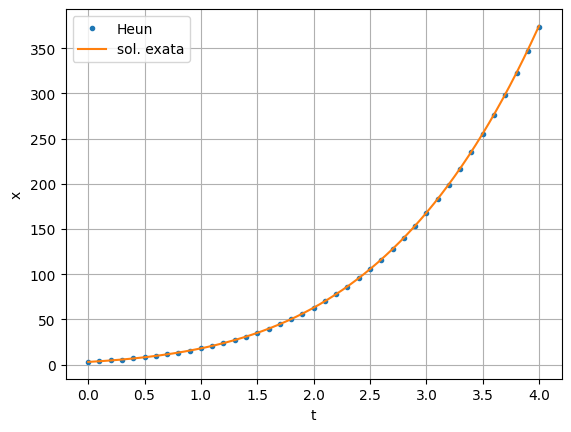

In [14]:
import numpy as np
from matplotlib import pyplot as pt


def f(x, t):
    return (2 * x) / (t + 1) + (t + 1) ** 3


# intervalo desejado [t0; tf]
t0 = 0
tf = 4
# condição inicial x(t0)
x0 = 3

# tamanho do passo
h = 0.1

# instantes de tempo
# tf + h/2 pra pegar t = 10 também
t = np.arange(t0, tf + h / 2, h)

# vetor que vai conter o resultado
x = np.zeros(len(t))
# o valor inicial em t=t0 já temos
x[0] = x0

# agora vamos aplicar o método de Heun sucessivamente
for i in range(len(t) - 1):
    # fórmula do método de Heun
    k1 = f(x[i], t[i])
    k2 = f(x[i] + h * k1, t[i] + h)
    x[i + 1] = x[i] + (h / 2) * (k1 + k2)

# finalmente, plotamos a solução obtida, junto com a solução exata
pt.plot(t, x, '.')
# solução exata
tt = np.arange(t0, tf, 0.001)
pt.plot(tt, 0.5 * (1 + tt) ** 2 * (6 + 2 * tt + tt**2))
pt.xlabel('t')
pt.ylabel('x')
pt.grid()
pt.legend(['Heun', 'sol. exata'])

## Métodos de Runge-Kutta de ordem mais alta

Existe uma infinidade de métodos de Runge-Kutta para cada ordem. Aqui vamos mostrar os mais tradicionais de 3$^a$ e de 4$^a$ ordens.

### Runge-Kutta de ordem 3

A cada passo, calculamos a aproximação da solução num passo $h$ usando:

$$ \begin{aligned}
k_1 &= f\left(x(t), t\right) \\
k_2 &= f\left(x(t) + \frac{h}{2} k_1, t+\frac{h}{2}\right) \\
k_3 &= f\left(x(t) + \frac{3}{4} h k_2, t+\frac{3}{4}h\right) \\
x(t+h) &= x(t) + \frac{h}{9}(2k_1 + 3k_2 + 4k_3)
\end{aligned}$$

### Runge-Kutta de ordem 4

Este é o método de Runge-Kuttta mais famoso, e o mais usado. A cada passo, calculamos a aproximação da solução num passo $h$ é dada por:

$$ \begin{aligned}
k_1 &= f\left(x(t), t\right) \\
k_2 &= f\left(x(t) + \frac{h}{2} k_1, t+\frac{h}{2}\right) \\
k_3 &= f\left(x(t) + \frac{h}{2} k_2, t+\frac{h}{2}\right) \\
k_4 &= f\left(x(t) + h k_3, t+h\right) \\
x(t+h) &= x(t) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}$$

### Exercício 2

Resolva o mesmo PVI anterior usando o método de Runge-Kutta de ordem 4 mostrado acima. Plote a solução obtida junto com a solução exata.


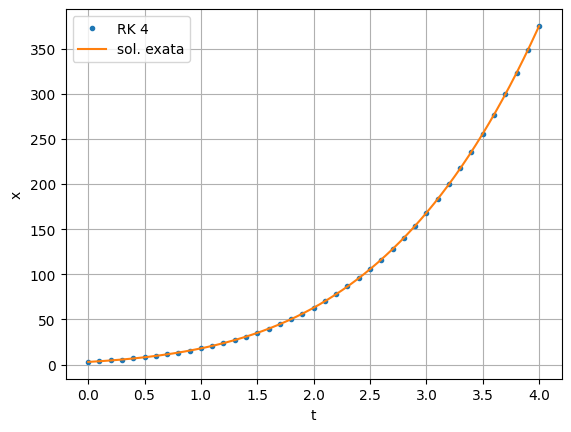

In [15]:
def f(x, t):
    return (2 * x) / (t + 1) + (t + 1) ** 3


# intervalo desejado [t0; tf]
t0 = 0
tf = 4
# condição inicial x(t0)
x0 = 3

# tamanho do passo
h = 0.1

# instantes de tempo
# tf + h/2 pra pegar t = 10 também
t = np.arange(t0, tf + h / 2, h)

# vetor que vai conter o resultado
x = np.zeros(len(t))
# o valor inicial em t=t0 já temos
x[0] = x0

# agora vamos aplicar o método de Runge-Kutta sucessivamente
for i in range(len(t) - 1):
    # fórmula do método de Runge-Kutta
    k1 = f(x[i], t[i])
    k2 = f(x[i] + (h / 2) * k1, t[i] + (h / 2))
    k3 = f(x[i] + (h / 2) * k2, t[i] + (h / 2))
    k4 = f(x[i] + h * k3, t[i] + h)
    x[i + 1] = x[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# finalmente, plotamos a solução obtida, junto com a solução exata
pt.plot(t, x, '.')
# solução exata
tt = np.arange(t0, tf, 0.001)
pt.plot(tt, 0.5 * (1 + tt) ** 2 * (6 + 2 * tt + tt**2))
pt.xlabel('t')
pt.ylabel('x')
pt.grid()
pt.legend(['RK 4', 'sol. exata'])

### Exercício 3

Agora vamos generalizar o método de Runge-Kutta de ordem 4 numa função `rk4`(), que recebe a função $f$ da EDO, a condição inicial $x_0$, o intervalo de tempo desejado $[t_0; t_f]$, e o tamanho do passo $h$.

In [16]:
def rk4(f, x0, t0, tf, h):
    t = np.arange(t0, tf + h / 2, h)
    x = np.zeros(len(t))
    x[0] = x0

    for i in range(len(t) - 1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + (h / 2) * k1, t[i] + (h / 2))
        k3 = f(x[i] + (h / 2) * k2, t[i] + (h / 2))
        k4 = f(x[i] + h * k3, t[i] + h)
        x[i + 1] = x[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return x

In [17]:
# confira que você obteve a mesma solução acima
x = rk4(f, x0, t0, tf, h)

### Exercício 4

Agora vamos comparar os 3 métodos: Euler (implementado na aula passada), Heun, e Runge-Kutta de ordem 4. Calcule o erro absoluto de cada um e plote todos juntos.

In [18]:
def euler(f, x0, t0, tf, h):
    t = np.arange(t0, tf + h / 2, h)
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(len(t) - 1):
        x[i + 1] = x[i] + h * f(x[i], t[i])
    return x

In [19]:
# calcule a solução usando Heun
# copie o código anterior aqui
def f(x, t):
    return (2 * x) / (t + 1) + (t + 1) ** 3


# intervalo desejado [t0; tf]
t0 = 0
tf = 4
# condição inicial x(t0)
x0 = 3

# tamanho do passo
h = 0.1

# instantes de tempo
# tf + h/2 pra pegar t = 10 também
t = np.arange(t0, tf + h / 2, h)

# vetor que vai conter o resultado
x = np.zeros(len(t))
# o valor inicial em t=t0 já temos
x[0] = x0

# agora vamos aplicar o método de Heun sucessivamente
for i in range(len(t) - 1):
    # fórmula do método de Heun
    k1 = f(x[i], t[i])
    k2 = f(x[i] + h * k1, t[i] + h)
    x[i + 1] = x[i] + (h / 2) * (k1 + k2)
xheun = x

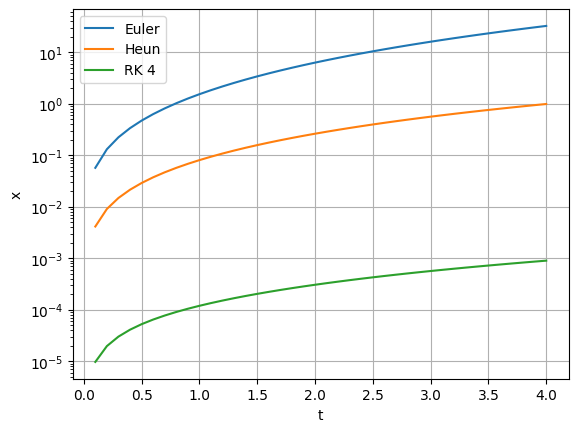

In [20]:
# calculando a solução usando método de Euler
xeu = euler(f, x0, t0, tf, h)
# calculando a solução usando método RK 4z
xrk4 = rk4(f, x0, t0, tf, h)

# calculando erro absoluto
xexato = 0.5 * (1 + t) ** 2 * (6 + 2 * t + t**2)
erro_euler = np.abs(xexato - xeu)
erro_heun = np.abs(xexato - xheun)
erro_rk4 = np.abs(xexato - xrk4)

# plotando todos juntos
pt.plot(t[1:], erro_euler[1:])
pt.plot(t[1:], erro_heun[1:])
pt.plot(t[1:], erro_rk4[1:])
pt.xlabel('t')
pt.ylabel('x')
pt.grid()
pt.legend(['Euler', 'Heun', 'RK 4'])
# pode ser interessante usar escala log
pt.yscale('log')

# Método de Runge-Kutta para sistemas de EDOs

Assim como fizemos antes com o método de Euler, podemos facilmente generalizar os métodos de Runge-Kutta para aplicá-los a sistemas de EDOs. Vamos usar como exemplo o método de Runge-Kutta de ordem 4 discutido na aula passada, mas o mesmo procedimento se aplica a todos os métodos de Runge-Kutta.

Um Problema de Valor Inicial é dado pelo sistema de EDOs e as condições iniciais:

$$ \begin{aligned}
    \frac{dx_1}{dt} &= f_1((x_1, x_2, \ldots, x_n) , t) = f_1(\vec{x}, t) \\
    \frac{dx_2}{dt} &= f_2(\vec{x}, t) \\
    \vdots\\
    \frac{dx_n}{dt} &= f_n(\vec{x}, t)\\
    x_1(t_0) &= v_1\ ,\ x_2(t_0) = v_2\ ,\ \ldots,\ x_n(t_0) = v_n\\
    &\text{ou simplesmente } \vec{x}(t_0) = \vec{v}_0
\end{aligned}$$

Uma forma mais compacta de escrever esse sistema é:

$$ \frac{d\vec{x}}{dt} =
\begin{bmatrix}\frac{dx_1}{dt}\\\frac{dx_2}{dt}\\\vdots\\ \frac{dx_n}{dt}
\end{bmatrix}
= \vec{F}(\vec{x}, t) = \begin{bmatrix}f_1(\vec{x}, t)\\ f_2(\vec{x}, t)\\ \vdots \\ f_n(\vec{x}, t)\end{bmatrix}$$

onde $\vec{F}$ é uma função $\mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$, ou seja, ela recebe $n$ componentes do vetor $x$ e o tempo $t$, e retorna $n$ valores, correspondentes às funções $f_i$ acima.

Relembremos que o método de Runge-Kutta consiste em calcular uma aproximação para a derivada calculando a função $f$ em vários instantes no intervalo $[t; t+h]$. Por exemplo, o de ordem 4, com passo $h$, era dado pela fórmula:

$$ \begin{aligned}
k_1 &= f\left(x(t), t\right) \\
k_2 &= f\left(x(t) + \frac{h}{2} k_1, t+\frac{h}{2}\right) \\
k_3 &= f\left(x(t) + \frac{h}{2} k_2, t+\frac{h}{2}\right) \\
k_4 &= f\left(x(t) + h k_3, t+h\right) \\
x(t+h) &= x(t) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}$$

A generalização para um sistema de EDOs é imediata: teremos que calcular $k_1, k_2, k_3, k_4$ **para cada componente**, ou seja, para cada $f_i$. Assim, podemos simplificar a notação escrevendo os $k_i$'s como vetores:

$$ \begin{aligned}
\vec{k}_1 &= \vec{F}\left(\vec{x}(t), t\right) = \big(f_1(\vec{x}(t), t), f_2(\vec{x}(t), t), \ldots, f_n(\vec{x}(t), t)\big)\\
\vec{k}_2 &= \vec{F}\left(\vec{x}(t) + \frac{h}{2} \vec{k}_1, t+\frac{h}{2}\right) \\
\vec{k}_3 &= \vec{F}\left(\vec{x}(t) + \frac{h}{2} \vec{k}_2, t+\frac{h}{2}\right) \\
\vec{k}_4 &= \vec{F}\left(\vec{x}(t) + h \vec{k}_3, t+h\right) \\
\vec{x}(t+h) &= \vec{x}(t) + \frac{h}{6}(\vec{k}_1 + 2\vec{k}_2 + 2\vec{k}_3 + \vec{k}_4)
\end{aligned}$$

## Exercício 5

Vamos implementar o método de Runge-Kutta de ordem 4 para sistemas de EDOs. Vamos usá-lo para resolver o PVI de 2$^a$ ordem:

$$ x'' + 2x' + x = \operatorname{sen}(t)\ ,\quad x(0) = 1\ ,\  x'(0) = 0 $$

cuja solução exata, usando os métodos de IEDO, é dada por:

$$ x(t) = \frac{3}{2} (1+t)\ e^{-t} - \frac{1}{2} \cos(t) $$

Encontre a solução no intervalo $[0, 10]$, usando $h = 0.5$. Compare-a com a solução exata.

### Dica
Antes de prosseguir, você precisa transformar a EDO de 2$^a$ ordem num sistema de 2 equações de 1$^a$ ordem.

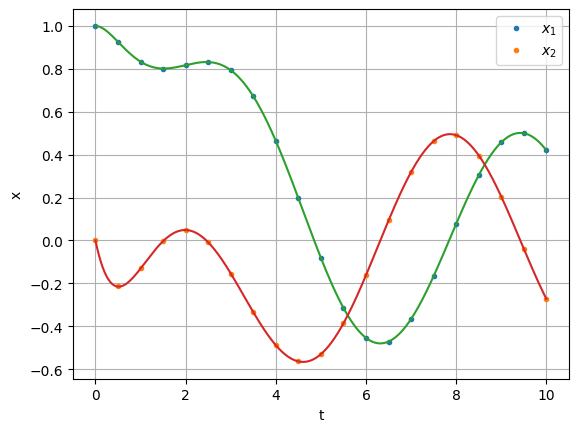

In [21]:
import numpy as np
from matplotlib import pyplot as plt

# lado direito do sistema de EDOs
# lembre que x **é um vetor** e a função **retorna um vetor**
# (veja o exemplo da aula anterior)
def f(x, t):
    # x_1: x[0]
    # x_2: x[1]
    return np.array([x[1], np.sin(t) - 2 * x[1] - x[0]])  # dx_1/dt  # dx_2/dt


# intervalo desejado [t0; tf]
t0 = 0
tf = 10
# condição inicial x(t0)
x0 = np.array([1, 0])

# tamanho do passo
h = 0.5

# instantes de tempo
# tf + h/2 pra pegar t = 10 também
t = np.arange(t0, tf + h / 2, h)

# vetor que vai conter o resultado
# tem o mesmo número de colunas que a condição inicial
# (neste caso, 2 colunas, para x_1(t) e x_2(t))
x = np.zeros((len(t), x0.shape[0]))
# o valor inicial em t=t0 já temos
x[0] = x0


# agora vamos aplicar o método de Runge-Kutta sucessivamente
for i in range(len(t) - 1):

    # fórmula do método de Runge-Kutta
    k1 = f(x[i], t[i])

    k2 = f(x[i] + (h / 2) * k1, t[i] + (h / 2))

    k3 = f(x[i] + (h / 2) * k2, t[i] + (h / 2))

    k4 = f(x[i] + h * k3, t[i] + h)

    x[i + 1] = x[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# finalmente, plotamos a solução obtida, junto com a solução exata
plt.plot(t, x[:, 0], '.')
plt.plot(t, x[:, 1], '.')
# solução exata
tt = np.arange(t0, tf, 0.001)
plt.plot(tt, 1.5 * (1 + tt) * np.exp(-tt) - np.cos(tt) / 2)
plt.plot(tt, -1.5 * tt * np.exp(-tt) + np.sin(tt) / 2)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.legend(['$x_1$', '$x_2$'])
plt.show()

## Exercício 6

Vamos generalizar o método de Runge-Kutta de ordem 4 para um sistema de EDOs, escrevendo uma função `rk4_sistema()`, que deve receber a função $\vec{F}$ (que recebe um vetor $\vec{x}$ e o tempo, e retorna um vetor com as derivadas), além da condição inicial, o intervalo de integração $[t_0; t_f]$ e o tamanho do passo $h$.

In [22]:
def rk4_sistema(f, x0, t0, tf, h):

    n = len(x0)

    num_steps = int((tf - t0) / h)

    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros((num_steps + 1, n))
    x[0] = x0

    for i in range(num_steps):
        k1 = h * f(x[i], t[i])
        k2 = h * f(x[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(x[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(x[i] + k3, t[i] + h)
        x[i + 1] = x[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, x

In [23]:
def f(x, t):
    return np.array([x[1], np.sin(t) - 2 * x[1] - x[0]])  # dx_1/dt  # dx_2/dt


t0 = 0
tf = 10
x0 = np.array([1, 0])
h = 0.5

# fazendo o mesmo cálculo do ex. 1, mas usando a função rk4_sistema
x = rk4_sistema(f, x0, t0, tf, h)

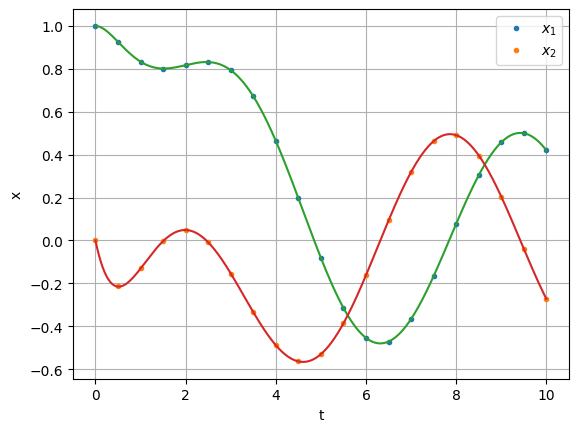

In [24]:
# Checando se o resultado é válido assim como o primeiro obtido:

plt.plot(t, x[1][:, 0], '.')
plt.plot(t, x[1][:, 1], '.')
tt = np.arange(t0, tf, 0.001)
plt.plot(tt, 1.5 * (1 + tt) * np.exp(-tt) - np.cos(tt) / 2)
plt.plot(tt, -1.5 * tt * np.exp(-tt) + np.sin(tt) / 2)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.legend(['$x_1$', '$x_2$'])
plt.show()